In [1]:
%matplotlib inline

import numpy as np
from annoy import AnnoyIndex
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import networkx as nx

from lib import graph, analysis

In [2]:
G = graph.build_from_database(100)

[[  1.31938534e+00   9.35070106e-01   1.54615730e-19]
 [  2.19897556e-01   0.00000000e+00  -9.42147286e-18]
 [  1.01152876e+01   5.81821399e+00   4.35309426e-21]
 [  4.39795112e-01   1.03896678e-01   1.86913893e-18]
 [  4.39795112e-01   4.77924721e+00   4.38877256e-21]
 [  4.39795112e-01   1.03896678e-01   7.53717829e-18]
 [  4.39795112e-01   1.03896678e-01  -9.42147286e-18]
 [  4.39795112e-01   1.03896678e-01   9.42147286e+00]
 [  4.39795112e-01   1.03896678e-01   6.92957880e-18]
 [  4.39795112e-01   1.03896678e-01   7.10294064e-18]
 [  4.39795112e-01   1.03896678e-01   7.08701960e-18]
 [  4.39795112e-01   1.03896678e-01   7.68825070e-18]
 [  4.39795112e-01   1.03896678e-01   6.65223033e-18]
 [  4.39795112e-01   1.03896678e-01   8.14786395e-16]
 [  4.39795112e-01   1.03896678e-01   9.05249724e-18]
 [  4.39795112e-01   1.03896678e-01   7.14583623e-18]
 [  4.39795112e-01   1.03896678e-01   1.68221863e-17]
 [  4.39795112e-01   1.03896678e-01   1.90202517e-18]
 [  4.39795112e-01   1.03896

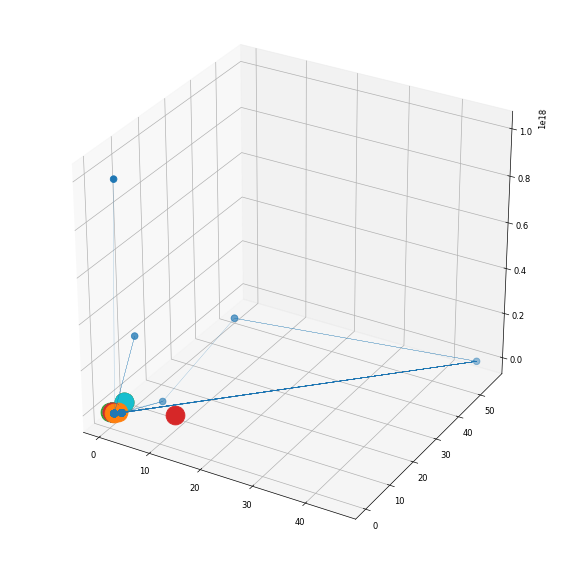

In [3]:
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection

(fin, fout) = analysis.get_egonet_features(G)
(outlier_indices, distances) = analysis.get_knn_outliers(3, fin)
(x, y, z) = zip(*fin)

whitened = whiten(fin)
book = array((whitened[0],whitened[2]))
(arr, weights) = kmeans(whitened, 100)
print(arr, weights)
D = {}
for inx, elt in enumerate(G.nodes()):
    D[elt] = inx

segments = [(fin[D[s]], fin[D[t]]) for s, t in G.edges()]                

fig = plt.figure(dpi=60, figsize=(12,12))
ax = fig.gca(projection='3d')
# ax.set_axis_off()
ax.scatter(x, y, z, marker='o', s = 64)

for inx, elt in enumerate(arr):
    ax.scatter([arr[inx][0]], [arr[inx][1]], [arr[inx][2]], marker='o', s = 512)

# plot edges
edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)
# # add vertices annotation.
# for j, xyz_ in enumerate(fin): 
#     annotate3D(ax, s=G.nodes()[j], xyz=xyz_, fontsize=10, xytext=(-3,3),
#                textcoords='offset points', ha='right',va='bottom')    